# Nearest neighbor for spine injury classification

In this homework notebook we use **nearest neighbor classification** to classify back injuries for patients in a hospital, based on measurements of the shape and orientation of their pelvis and spine.

The data set contains information from **310** patients. For each patient, there are: six measurements (the x) and a label (the y). The label has **3** possible values, `’NO’` (normal), `’DH’` (herniated disk), or `’SL’` (spondilolysthesis). 

**Note:** Before attempting this homework, please go through the <font color="magenta">*Nearest neighbor for handwritten digit recognition*</font> notebook.

# 1. Setup notebook

We import all necessary packages for the homework. Notice that we do **NOT** import any of the `sklearn` packages. This is because we want you to implement a nearest neighbor classifier **manually**, as in the <font color="magenta">*Nearest neighbor for handwritten digit recognition*</font> notebook. 


In [127]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
from collections import Counter

We now load the dataset. We divide the data into a training set of 248 patients and a separate test set of 62 patients. The following arrays are created:

* **`trainx`** : The training data's features, one point per row.
* **`trainy`** : The training data's labels.
* **`testx`** : The test data's features, one point per row.
* **`testy`** : The test data's labels.

We will use the training set (`trainx` and `trainy`), with nearest neighbor classification, to predict labels for the test data (`testx`). We will then compare these predictions with the correct labels, `testy`.

Notice that we code the three labels as `0. = ’NO’, 1. = ’DH’, 2. = ’SL’`.

In [451]:
# Load data set and code labels as 0 = ’NO’, 1 = ’DH’, 2 = ’SL’
labels = [b'NO', b'DH', b'SL']
data = np.loadtxt('column_3C.dat', converters={6: lambda s: labels.index(s)} )

# Separate features from labels
x = data[:,0:6]
y = data[:,6]

# Divide into training and test set
training_indices = list(range(0,20)) + list(range(40,188)) + list(range(230,310))
test_indices = list(range(20,40)) + list(range(188,230))

trainx = x[training_indices,:]
trainy = y[training_indices]
testx = x[test_indices,:]
testy = y[test_indices]

In [200]:
trainx[0,]

array([63.03, 22.55, 39.61, 40.48, 98.67, -0.25])

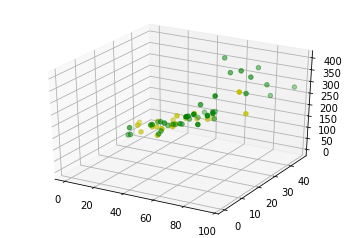

In [102]:
# following line is only necessary, if you use ipython notebook!!!
%matplotlib inline 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#colours = ("r", "b")
X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(testx)):
        if trainy[i] == iclass:
            X[iclass][0].append(testx[i][0])
            X[iclass][1].append(testx[i][1])
            X[iclass][2].append(sum(testx[i][2:]))
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
       ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

In [56]:
trainy.shape

(248,)

In [57]:
testx.shape

(62, 6)

In [58]:
testy.shape

(62,)

## 2. Nearest neighbor classification with L2 distance

In this exercise we will build a nearest neighbor classifier based on L2 (*Euclidean*) distance.

<font color="magenta">**Project Task :**</font> Write a function, **NN_L2**, which takes as input the training data (`trainx` and `trainy`) and the test points (`testx`) and predicts labels for these test points using 1-NN classification. These labels should be returned in a `numpy` array with one entry per test point. For **NN_L2**, the L2 norm should be used as the distance metric.


<font  style="color:blue"> **Code**</font>
```python
# test function 
testy_L2 = NN_L2(trainx, trainy, testx)
print( type( testy_L2) )
print( len(testy_L2) )
print( testy_L2[40:50] )
```

<font  style="color:magenta"> **Output**</font>
```
<class 'numpy.ndarray'>
62
[ 2.  2.  1.  0.  0.  0.  0.  0.  0.  0.]
```


In [452]:
# Modify this Cell
def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)

    return np.linalg.norm(instance1 - instance2)
    
    #return np.sum(np.square(instance1,instance2))
def NN_L2(trainx, trainy, testx):
    # inputs: trainx, trainy, testx <-- as defined above
    # output: an np.array of the predicted values for testy 
    
    ### BEGIN SOLUTION
    #distances = []
    testy2=testy.copy()
    for index in range(len(testy2)):
        dist=distance(testx[index,],trainx[0,])      
        #Compare the test datapoint with all other in train data and save in the test y
        for i in range (len(trainy)):
            new_dist = distance(testx[index,], trainx[i,])
            #testy2[index,]=trainy[i,]       
            #Compare the distance 
            if new_dist < dist:
                testy2[index,]=trainy[i,]
                dist=new_dist
          
              
                    
   
    return testy2

    ### END SOLUTION

After you are done, run the cell below to check your function. If an error is triggered, you should go back and revise your function.

In [453]:
testy_L2 = NN_L2(trainx, trainy, testx)

assert( type( testy_L2).__name__ == 'ndarray' )
assert( len(testy_L2) == 62 ) 
assert( np.all( testy_L2[50:60] == [ 0.,  0.,  0.,  0.,  2.,  0.,  2.,  0.,  0.,  0.] )  )
assert( np.all( testy_L2[0:10] == [ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.] ) )

In [454]:
# Check my code  with sample  given in the example
testy_L2 = NN_L2(trainx, trainy, testx)
print( type( testy_L2) )
print( len(testy_L2) )
print( testy_L2[40:50] )

<class 'numpy.ndarray'>
62
[2. 2. 1. 0. 0. 0. 0. 0. 0. 0.]


# 3. Nearest neighbor classification with L1 distance

We now compute nearest neighbors using the L1 distance (sometimes called *Manhattan Distance*).

<font color="magenta">**Project Task:**</font> Write a function, **NN_L1**, which again takes as input the arrays `trainx`, `trainy`, and `testx`, and predicts labels for the test points using 1-nearest neighbor classification. For **NN_L1**, the L1 distance metric should be used. As before, the predicted labels should be returned in a `numpy` array with one entry per test point.

Notice that **NN_L1** and **NN_L2** may well produce different predictions on the test set.


<font  style="color:blue"> **Code**</font>
```python
# test function 
testy_L2 = NN_L2(trainx, trainy, testx)
testy_L1 = NN_L1(trainx, trainy, testx)

print( type( testy_L1) )
print( len(testy_L1) )
print( testy_L1[40:50] )
print( all(testy_L1 == testy_L2) )
```

<font  style="color:magenta"> **Output**</font>
```
<class 'numpy.ndarray'>
62
[ 2.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
False
```


In [383]:
a=np.array([1,2,3,4])
b=np.array([3,4,1,2])
sub_dif=0;
for i in range(len(a)):
    sub_dif+=abs(a[i]-b[i])
sub_dif

8

In [461]:
# Modify this Cell
def distance1(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    sub_dif=0
    
    for i in range(len(instance1)):
        sub_dif+=abs(instance1[i]-instance2[i])
    
    return sub_dif
def NN_L1(trainx, trainy, testx):
    # inputs: trainx, trainy, testx <-- as defined above
    # output: an np.array of the predicted values for testy 
    
    ### BEGIN SOLUTION
    #distances1 = []
    testy1=testy.copy()
    for index in range(len(testy1)):
        new_dist=distance1(testx[index,],trainx[0,])
        #Compare the test datapoint with all other in train data and save in the test y
        for i in range (len(trainy)):
            dist = distance1(testx[index,], trainx[i,])
            #Compare the distance 
            if dist < new_dist:
                testy1[index,]=trainy[i,]
                new_dist=dist
   
    return testy1
    ### END SOLUTION

Again, use the following cell to check your code.

In [462]:
testy_L1 = NN_L1(trainx, trainy, testx)
testy_L2 = NN_L2(trainx, trainy, testx)

assert( type( testy_L1).__name__ == 'ndarray' )
assert( len(testy_L1) == 62 ) 
assert( not all(testy_L1 == testy_L2) )
assert( all(testy_L1[50:60]== [ 0.,  2.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.]) )
assert( all( testy_L1[0:10] == [ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.]) )

In [463]:
# test function 
testy_L2 = NN_L2(trainx, trainy, testx)
testy_L1 = NN_L1(trainx, trainy, testx)

print( type( testy_L1) )
print( len(testy_L1) )
print( testy_L1[40:50] )
print( all(testy_L1 == testy_L2) )

<class 'numpy.ndarray'>
62
[2. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
False


In [464]:
testy==testy_L2

array([False, False, False,  True,  True, False,  True, False, False,
        True, False,  True, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True])

In [465]:
testy_L1

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 1., 0., 2., 0., 0., 0., 0., 0., 1., 0.])

In [475]:
testy

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [474]:
testy_L2

array([0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 2., 0., 2., 0., 0., 0., 0., 0.])

In [467]:
print(not all(testy_L2==testy_L1))

True


# 4. Test errors and the confusion matrix

Let's see if the L1 and L2 distance functions yield different error rates for nearest neighbor classification of the test data.

In [486]:
def error_rate(testy, testy_fit):
    return float(sum(testy!=testy_fit))/len(testy) 

print("Error rate of NN_L1: ", error_rate(testy,testy_L1) )
print("Error rate of NN_L2: ", error_rate(testy,testy_L2) )

Error rate of NN_L1:  0.22580645161290322
Error rate of NN_L2:  0.20967741935483872


We will now look a bit more deeply into the specific types of errors made by nearest neighbor classification, by constructing the <font color="magenta">*confusion matrix*</font>.

Since there are three labels, the confusion matrix is a 3x3 matrix whose rows correspond to the true label and whose columns correspond to the predicted label. For example, the entry at row DH, column SL, contains the number of test points whose correct label was DH but which were classified as SL.

<img style="width:200px" src="confusion_matrix.png">




<font color="magenta">**Project Task:**</font>Write a function, **confusion**, which takes as input the true labels for the test set (that is, `testy`) as well as the predicted labels and returns the confusion matrix. The confusion matrix should be a `np.array` of shape `(3,3)` . 

<font  style="color:blue"> **Code**</font>
```python
L2_neo = confusion(testy, testy_L2)  
print( type(L2_neo) )
print( L2_neo.shape )
print( L2_neo )
```

<font  style="color:magenta"> **Output**</font>
```
<class 'numpy.ndarray'>
(3, 3)
[[ 17.   1.   2.]
 [ 10.  10.   0.]
 [  0.   0.  22.]]
```


In [482]:
# Modify this cell

def confusion(testy,testy_fit):
    # inputs: the correct labels, the fitted NN labels 
    # output: a 3x3 np.array representing the confusion matrix as above
    
    ### BEGIN SOLUTION
    dif=0
    confi=np.zeros([3,3])
 
    for i in range(len(testy)):
        confi[int(testy[i]),int(testy_fit[i])]+=1
    print("Confusion at [0][0]",confi[0,0])
    return confi
        
    
            
    ### END SOLUTION

In [483]:
testy

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Now check the above codes by running the following cell.

In [484]:
# Test Function

L1_neo = confusion(testy, testy_L1) 
assert( type(L1_neo).__name__ == 'ndarray' )
assert( L1_neo.shape == (3,3) )
assert( np.all(L1_neo == [[ 16.,  2.,  2.],[ 10.,  10.,  0.],[ 0.,  0.,  22.]]) )
L2_neo = confusion(testy, testy_L2)  
assert( np.all(L2_neo == [[ 17.,  1.,  2.],[ 10.,  10.,  0.],[ 0.,  0.,  22.]]) )

Confusion at [0][0] 16.0
Confusion at [0][0] 17.0


In [485]:
L2_neo = confusion(testy, testy_L2)  
print( type(L2_neo) )
print( L2_neo.shape )
print( L2_neo )

Confusion at [0][0] 17.0
<class 'numpy.ndarray'>
(3, 3)
[[17.  1.  2.]
 [10. 10.  0.]
 [ 0.  0. 22.]]


In [487]:
L1_neo = confusion(testy, testy_L1)  
print( type(L1_neo) )
print( L1_neo.shape )
print( L1_neo )


Confusion at [0][0] 16.0
<class 'numpy.ndarray'>
(3, 3)
[[16.  2.  2.]
 [10. 10.  0.]
 [ 0.  0. 22.]]


In [492]:
sum(testy_L1!=testy_L2)

7

# 5. Some questions for you

*Note down the answers to these, since you will need to enter them as part of this week's assignment.*

* In the test set, which class (NO, DH, or SL) was **most frequently** misclassified by the L1-based nearest neighbor classifier?
* In the test set, which class (NO, DH, or SL) was **never** misclassified by the L2-based nearest neighbor classifier?
* On **how many** of the test points did the two classification schemes (based on L1 and L2 distance) yield *different* predictions?


<font color="RED">**Asnwer:**</font>

In [495]:
sum(np.not_equal(testy_L1,testy_L2))

7